In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d

from dotenv import load_dotenv, find_dotenv
from pathlib import Path

from src.data.rgbd import load_rgbd
from src.data.pcd import load_pcd
from src.features.cropping import box_mask_from_rgbd

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
project_dir = Path(dotenv_path).parent

# load up the entries as environment variables
load_dotenv(dotenv_path)

o3d.visualization.webrtc_server.enable_webrtc()

[Open3D INFO] WebRTC GUI backend enabled.


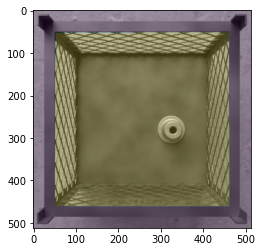

In [3]:
raw_data_dir = project_dir/'data/raw/render_results_imov_cam_mist_simple'

img_fpath = np.random.choice(list(raw_data_dir.glob('*/*.exr')))

rgbd = load_rgbd(img_fpath)

box = box_mask_from_rgbd(rgbd)

plt.imshow(rgbd.color, cmap='gray')
plt.imshow(box, alpha=0.2)
plt.show()

In [12]:
x, y = np.indices(box.shape)

v1 = (x + y) * box
v1 = np.argwhere(v1 == np.max(v1))[0]

v2 = (box.shape[0] - x + box.shape[1] - y) * box
v2 = np.argwhere(v2 == np.max(v2))[0]

v3 = (box.shape[0] - x + y) * box
v3 = np.argwhere(v3 == np.max(v3))[0]

v4 = (x + box.shape[1] - y) * box
v4 = np.argwhere(v4 == np.max(v4))[0]

vertices = [v1, v3, v2, v4]
vertices

[array([460, 461]), array([ 52, 460]), array([53, 53]), array([459,  51])]

In [13]:
depth = np.array(rgbd.depth)
c = (256, 256)
f = 711.1111

real_vertices = list()
for v in vertices:
    z = depth[v[0], v[1]]

    x_ = v[0] - c[0]
    x_ = z * x_ / f

    y_ = v[1] - c[0]
    y_ = z * y_ / f

    real_vertices.append((x_, y_))

real_vertices

[(0.26668346713688795, 0.2679907390346178),
 (-0.27618819746530526, 0.27618819746530526),
 (-0.2999980541068429, -0.2999980541068429),
 (0.2750762908021122, -0.27778640204154187)]

In [14]:
pcd = load_pcd(img_fpath)
pcd

PointCloud with 262144 points.

In [17]:
bounding_polygon = np.array([[v[1], v[0], 0] for v in real_vertices])

vol = o3d.visualization.SelectionPolygonVolume()
vol.orthogonal_axis = "Z"
vol.axis_min = 0
vol.axis_max = 1.5
vol.bounding_polygon = o3d.utility.Vector3dVector(bounding_polygon)

box_pcd = vol.crop_point_cloud(pcd)
box_pcd

PointCloud with 103625 points.

In [18]:
o3d.visualization.draw([box_pcd])

[Open3D INFO] Window window_3 created.
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closing, peerid: 0.11968879511699515
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: closed, peerid: 0.11968879511699515
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closing, peerid: 0.11968879511699515
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: closed, peerid: 0.11968879511699515
[Open3D INFO] [Called HTTP API] /api/hangup
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/call


[636:699][743635] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call
[Open3D INFO] [Called HTTP API] /api/call


[637:645][743635] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[637:657][743635] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[637:686][743635] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0
[637:737][743635] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.2391029503160773
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.2391029503160773
[Open3D INFO] Sending init frames to window_3.
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /a

[643:861][743639] (stun_port.cc:308): Port[901283e0:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1072 bytes failed with error 11
[643:861][743639] (stun_port.cc:308): Port[901283e0:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1072 bytes failed with error 11
[643:861][743639] (stun_port.cc:308): Port[901283e0:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1072 bytes failed with error 11
[643:861][743639] (stun_port.cc:308): Port[901283e0:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1072 bytes failed with error 11
[643:861][743639] (stun_port.cc:308): Port[901283e0:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1072 bytes failed with error 11
[643:861][743639] (stun_port.cc:308): Port[901283e0:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unknown:id=1]]: UDP send of 1072 bytes failed with error 11
[643:861][743639] (stun_port.cc:308): Port[901283e0:0:1:0:local:Net[enp5s0:150.162.14.x/24:Unk

KeyboardInterrupt: 

In [7]:
pcd.points

std::vector<Eigen::Vector3d> with 262144 elements.
Use numpy.asarray() to access data.

In [5]:
o3d.visualization.draw([pcd])

[Open3D INFO] Window window_0 created.
[Open3D INFO] EGL headless mode enabled.
[Open3D INFO] ICE servers: {"stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"}
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC HTTP server handshake mode enabled.
[Open3D INFO] Open3D WebVisualizer is serving at http://150.162.14.54:8889.
[Open3D INFO] Set WEBRTC_IP and WEBRTC_PORT environment variable to customize the HTTP server address.
[Open3D INFO] [Called HTTP API] /api/getMediaList
[Open3D INFO] [Called HTTP API] /api/getIceServers
[Open3D INFO] [Called HTTP API] /api/call


[000:000][743635] (webrtc_video_engine.cc:3394): Absent receive stream; ignoring clearing encoded frame sink for ssrc 0


[Open3D INFO] [Called HTTP API] /api/getIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] [Called HTTP API] /api/addIceCandidate
[Open3D INFO] DataChannelObserver::OnStateChange label: ServerDataChannel, state: open, peerid: 0.4931306371458599
[Open3D INFO] DataChannelObserver::OnStateChange label: ClientDataChannel, state: open, peerid: 0.4931306371458599
[Open3D INFO] Sending init frames to window_0.


KeyboardInterrupt: 